In [86]:
%matplotlib inline
import os
import sys
import glob
import argparse
import matplotlib.pyplot as plt
import numpy as np
import functools
import time

import keras

#from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam
from keras import metrics
from sklearn.metrics import confusion_matrix, f1_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import plot_model
from keras.models import load_model

from scipy.misc import imread, imshow, imresize

In [78]:
model_dir = "/Users/user1/Desktop/pbs_outputs/temp.model"
model = load_model(model_dir)

In [76]:
model.compile(
        optimizer= Adam(lr=0.0001),
        loss='categorical_crossentropy',
        metrics=[
            metrics.categorical_accuracy,
            metrics.top_k_categorical_accuracy,
            ]
        )

---
/project/BEN_DL/split_images/errors/5/23/2781923-4141.jpg
/Users/user1/Desktop/thesis/data/split_images/benthoz_retrain/testing/5/2781923-4141.jpg
---
/project/BEN_DL/split_images/errors/5/23/2785249-9841.jpg
/Users/user1/Desktop/thesis/data/split_images/benthoz_retrain/testing/5/2785249-9841.jpg
---
/project/BEN_DL/split_images/errors/5/5/2786645-12049.jpg
/Users/user1/Desktop/thesis/data/split_images/benthoz_retrain/testing/5/2786645-12049.jpg
---
/project/BEN_DL/split_images/errors/5/6/2787387-13115.jpg
/Users/user1/Desktop/thesis/data/split_images/benthoz_retrain/testing/5/2787387-13115.jpg
---
/project/BEN_DL/split_images/errors/5/23/2791952-20033.jpg
/Users/user1/Desktop/thesis/data/split_images/benthoz_retrain/testing/5/2791952-20033.jpg
---
/project/BEN_DL/split_images/errors/5/5/2791952-20057.jpg
/Users/user1/Desktop/thesis/data/split_images/benthoz_retrain/testing/5/2791952-20057.jpg
---
/project/BEN_DL/split_images/errors/5/5/2793584-22521.jpg
/Users/user1/Desktop/thesis

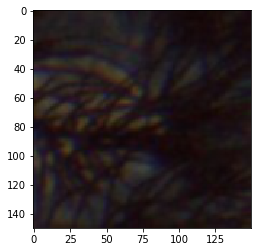

In [110]:
im_dir = '/Users/user1/Desktop/thesis/data/split_images/benthoz_retrain/testing/'
out_dir = '/project/BEN_DL/split_images/errors/'
#im = imresize(imread(im_dir), (150,150)).reshape(1, 150,150,3)

crop_addresses = glob.glob(os.path.join(im_dir,'*/*.jpg'))

crop_addresses = crop_addresses[960:970]
for im_dir in crop_addresses:
    im = imresize(imread(im_dir), (150,150)).reshape((1, 150, 150, 3))
    print("---")
    true = int(im_dir.split('/')[-2])
    pred = np.argmax(model.predict(im), axis=1)[0]
    #if not true==pred:
    print(os.path.join(out_dir, str(true), str(pred), im_dir.split('/')[-1]))
    print(im_dir)
    plt.imshow(im[0,:,:,:])
    

In [79]:
model.predict(im)
#y_true, y_pred = predictor(model, test_generator, 24)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]], dtype=float32)

In [69]:
np.sum(y_true==y_pred)/len(y_true)

0.042500000000000003

In [49]:
test_datagen =  ImageDataGenerator(
        rotation_range=30,
        horizontal_flip=True,
        vertical_flip=True,
        )
test_generator = test_datagen.flow_from_directory(
        '/Users/user1/Desktop/thesis/data/split_images/benthoz_retrain/testing/',
        target_size=(150, 150),
        batch_size=50,
    )

Found 1200 images belonging to 24 classes.


In [52]:
def predictor(model, test_generator, steps):
    y_pred = np.array([]).reshape(0,24)
    y_true = np.array([]).reshape(0,24)

    for i in range(steps):
        features, labels = next(test_generator)
        batch_pred = model.predict(features, verbose=1)

        y_pred = np.append(y_pred, batch_pred, axis=0)
        y_true = np.append(y_true, labels, axis=0)

    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    return y_pred, y_true